# Python for HPC (scipy)

## Introduction

Python is a great general-purpose programming language on its own. This episode is focused on the basic syntax of the language. The lesson is particularly oriented to Scientific Computing. The episodes in the series include:

  * Basic Syntax 
  * The Python Standard Library
  * Numpy
  * **Scipy \[This notebook\]**
  * Matplotlib
  * Pandas
  * Cython

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from intereactive computing to scripting to big project developments.

In this tutorial, we will cover:

* special
* linalg
* fftpack
* optimize
* integrate
* spatial

SciPy (pronounced “Sigh Pie”) is open-source software for mathematics, science, and engineering.

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. 

SciPy is the most used Scientific library only second to GNU Scientific Library for C/C++.
There are several ad

Scipy in general operate on an array of NumPy arrays. 

SciPy contains varieties of sub packages which help to solve the most common issue related to Scientific Computation.

The main characteristics of scipy for Scientific Computing are:

 * **SciPy** is built in top of numpy
 * **SciPy** is a fully-featured version of Linear Algebra algorithms while Numpy contains only a few features.
 * **SciPy** includes algorithms to compute special functions, integration, root finding and spatial operations.

This is a short overview of some of the most important submodules.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Importing scipy

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

| Subpackage  | Description |
|-------------|:-----------:|
| cluster     | Clustering algorithms 
| constants   | Physical and mathematical constants 
| fftpack     | Fast Fourier Transform routines 
| integrate   | Integration and ordinary differential equation solvers 
| interpolate | Interpolation and smoothing splines
| io          | Input and Output 
| linalg      | Linear algebra 
| ndimage     | N-dimensional image processing 
| odr         | Orthogonal distance regression 
| optimize    | Optimization and root-finding routines 
| signal      | Signal processing 
| sparse      | Sparse matrices and associated routines 
| spatial     | Spatial data structures and algorithms 
| special     | Special functions
| stats       | Statistical distributions and functions

Different from numpy where importing the main module exposes most of the functionality, on scipy you need to import the subpackage that is needed.

For most part SciPy sub-packages need to be imported separately. For example:

In [1]:
from scipy import linalg, optimize

We will explore some SciPy subpackages

In [18]:
import scipy

## Special Functions (`scipy.special`)

`scipy.special` package contains numerous functions of mathematical physics.

Some functions are also included on `math` from Standard Library like Cubic Root, Exponential, Log sum Exponential. However, the functions provided by scipy.special can interact transparently with numpy arrays.

More advanced functions include: Gamma, Bessel, hypergeometric, Kelvin, beta, parabolic cylinder, Relative Error Exponential, etc..

For one line description all of these function, type in Python console: 

In [19]:
#help(scipy.special)

A few examples of using Special Functions from SciPy

In [16]:
from scipy import special

In [4]:
#Find cubic root of 27 & 64 using cbrt() function
cb = special.cbrt([27, 64])
#print value of cb
print(cb)

[3. 4.]


In [5]:
#define exp10 function and pass value in its
exp = special.exp10([1,10])
print(exp)


[1.e+01 1.e+10]


In [6]:
#find combinations of 5, 2 values using comb(N, k)
com = special.comb(5, 2, exact = False, repetition=True)
print(com)

15.0


In [7]:
#find permutation of 5, 2 using perm (N, k) function
per = special.perm(5, 2, exact = True)
print(per)

20


In [8]:
#Compute the log of the sum of exponentials of input elements.
a = np.arange(10)
ret1 = np.log(np.sum(np.exp(a)))
print(ret1)
ret2 = special.logsumexp(a)
print(ret2)

9.45862974442671
9.45862974442671


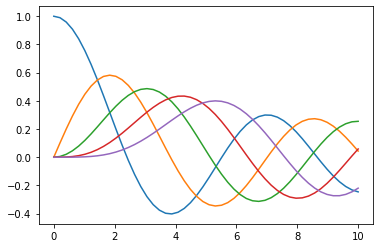

In [22]:
#Plot Bessel functions of the first kind of real order [0,4]
x=np.linspace(0,10,50)
for i in range(5):
    plt.plot(x,special.jn(i,x))

## Linear Algebra (`scipy.linalg`)

The Linear Algebra Routines of SciPy goes beyond the basic operations in numpy. They are implemented over 
BLAS and LAPACK libraries. The performance is dependent on the underline BLAS/LAPACK used for compile numpy.
In general it is based on Atlas, but you can compile numpy over a more optimized version of BLAS/LAPACK like 
OpenBLAS or Intel MKL.

Linear algebra routines in general take two-dimensional `numpy.ndarray` objects and output is also a two-dimensional 
`numpy.ndarray`.

In [24]:
from scipy import linalg

Compute the determinant of a square matrix like this:

In [29]:
#define square matrix
a = np.array([ [4,5], [3,2] ])
#pass values to det() function
linalg.det( a )

-7.0

In [31]:
#Compute the inverse of the matrix above
a_inv=scipy.linalg.inv(two_d_array)
np.dot(a,a_inv)

array([[1.00000000e+00, 0.00000000e+00],
       [3.33066907e-16, 1.00000000e+00]])

One common problem in linear algebra is eigenvalues and eigenvector which can be easily solved using eig()	function.
Now lets we find the Eigenvalue of (X) and correspond eigenvector of a two-dimensional square matrix.

In [32]:
#define two dimensional array
arr = np.array([[5,4],[6,3]])
#pass value into function
eg_val, eg_vect = linalg.eig(arr)
#get eigenvalues
print(eg_val)
#get eigenvectors
print(eg_vect)

[ 9.+0.j -1.+0.j]
[[ 0.70710678 -0.5547002 ]
 [ 0.70710678  0.83205029]]


Now, lets test that the dot product of the original matrix and the eigenvectors is in fact the product of the eigenvalues and the eigenvectors

\begin{equation*}
A \cdot \mathbf{v} = \lambda \mathbf{v}
\end{equation*}


In [33]:
np.dot(arr,eg_vect)

array([[ 6.36396103,  0.5547002 ],
       [ 6.36396103, -0.83205029]])

In [34]:
eg_val*eg_vect

array([[ 6.36396103+0.j,  0.5547002 -0.j],
       [ 6.36396103+0.j, -0.83205029+0.j]])

`scipy.linalg` contains all the functions in `numpy.linalg`. plus some other more advanced ones not contained in `numpy.linalg`.

Another advantage of using `scipy.linalg` over `numpy.linalg` is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version might be faster depending on how numpy was installed.

Therefore, unless you don’t want to add scipy as a dependency to your numpy program, use `scipy.linalg` instead of `numpy.linalg`.

One example of a function only present on scipy.linalg is the schur decomposition
The schur decomposition converts a matrix

\begin{equation*}
\mathbf{A} = \mathbf{Z} \cdot \mathbf{T} \cdot \mathbf{Z}^H 
\end{equation*}

The decomposition is not unique and real and complex matrices are possible solutions

In [40]:
A = np.mat('[1 3 2; 1 4 5; 2 3 6]')
print(A)
T, Z = scipy.linalg.schur(A)
print(T)
print(Z)
T1, Z1 = scipy.linalg.schur(A, 'complex')
print(T1)
print(Z1)

[[1 3 2]
 [1 4 5]
 [2 3 6]]
[[ 9.90012467  1.78947961 -0.65498528]
 [ 0.          0.54993766 -1.57754789]
 [ 0.          0.51260928  0.54993766]]
[[ 0.36702395 -0.85002495 -0.37782404]
 [ 0.63681656 -0.06646488  0.76814522]
 [ 0.67805463  0.52253231 -0.51691576]]
[[ 9.90012467+4.44089210e-16j  1.58629653-7.59468606e-02j
  -0.24901757+1.02329305e+00j]
 [ 0.        +0.00000000e+00j  0.54993766+8.99258408e-01j
   0.51778761+9.30585972e-01j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.54993766-8.99258408e-01j]]
[[-0.36066189-0.06804102j  0.7242709 -0.23617942j -0.53176194-0.04662187j]
 [-0.62577787-0.11805674j  0.08310692+0.37568066j  0.3351953 +0.57798448j]
 [-0.66630111-0.12570169j -0.47009285-0.22499096j -0.02697209-0.51759656j]]


## Discrete Fourier Transform `scipy.fftpack`

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). There is one very fast algorithm for computing DFT, it is called the Fast Fourier Transform (FFT).


For relatively simple operations `scipy.fftpack` is all that you need. However, when performance is critical the package `PyFFTW` provides a way to replace a number of functions in `scipy.fftpack` with its own functions, which are usually significantly faster, via `pyfftw.interfaces`. PyFFTW relies on the well known FFTW and could perform better.

One simple 1D example:

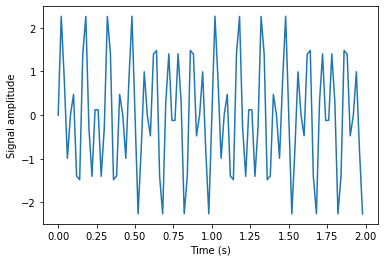

In [47]:
#Frequency in terms of Hertz
fre1  = 7 
fre2  = 13 
#Sample rate
fre_samp = 50
t = np.linspace(0, 2, 2 * fre_samp, endpoint = False )
a = np.sin(fre1  * 2 * np.pi * t) + 1.5 * np.sin(fre2  * 2 * np.pi * t)
figure, axis = plt.subplots()
axis.plot(t, a)
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal amplitude')
plt.show()

Now transforming this function to Fourier space:

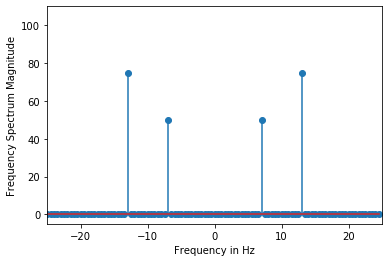

In [48]:
from scipy import fftpack
A = fftpack.fft(a)
frequency = fftpack.fftfreq(len(a)) * fre_samp
figure, axis = plt.subplots()

axis.stem(frequency, np.abs(A), use_line_collection=True)
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-fre_samp / 2, fre_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

## Optimization (`scipy.optimize`)

Optimization is a very important topic is scientific computing. The algorithms varies based on the behavior of the functions and availability of derivatives that can drive the search for a minima.

For local minimization `scipy.optimize` offers general unconstrained and constrained minimization of multivariate scalar functions (minimize) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP).

For global optimization there are routines like basinhopping, differential_evolution, shgo and dual_annealing.

Fiting a set of values to a given function can be presented as a minimization problem. The Least-squares minimization (least_squares) and curve fitting (curve_fit) algorithms are included here too.

Scalar univariate functions minimizers (minimize_scalar) and root finders (root_scalar)

Multivariate equation system solvers (root) using a variety of algorithms (e.g. hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov [KK]).


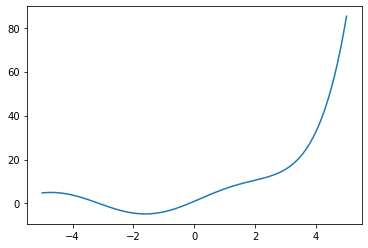

Optimization terminated successfully.
         Current function value: -4.761376
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


array([-1.61296123])

In [58]:
from scipy import optimize

def function(a):
       return 5*np.sin(a)+np.exp(0.9*a)

x=np.linspace(-5,5,100)

plt.plot(x, function(x))
plt.show()
#use BFGS algorithm for optimization
optimize.fmin_bfgs(function, 0) 

## Numerical Integration (`scipy.integrate`)

This module in SciPy provides functionality for numerical integration.
`scipy.integrate` library has single integration, double, triple, multiple, Gaussian quadrate, Romberg, Trapezoidal 
and Simpson's rules.

In [6]:
from scipy import integrate

In [8]:
# A univaluated function
def f(x):
    return x**2+np.sin(x)*np.exp(0.9*x)

#single integration with a = 0 & b = 1  
integration = integrate.quad(f, 0 , 1)
print(integration)

(1.1807294407836504, 1.310873011010794e-14)


Here function returns two values, in which the first value is integration and second value is estimated error in integral.

Example: Now take an example of double integration. We find the double integration of the following equation, 

In [13]:
# set  fuction f(x,y)
def f(x,y): 
    return np.sin(x)+np.cos(2*y)

# lower limit of second integral
p = lambda x : 0
# upper limit of first integral
q = lambda y : np.sqrt(1 - 2*y**2)
# perform double integration
integration = integrate.dblquad(f , 0 , 2/4,  p, q)
print(integration)


(0.5821250757905987, 1.6205849617199068e-14)


## Spatial Operations (`scipy.spatial`)

`scipy.spatial` can compute a number operations over points in a multidimensional space. Triangulations, Voronoi diagrams, and convex hulls of a set of points. Lets see some examples in 2D but the same operations are available in larger dimensions.

In [15]:
import scipy.spatial

### Delaunay triangulations

In [21]:
points = np.array([[2,2],[0, 0], [0, 1.1], [1, 0], [1, 1], [2,3], [-1,-3], [1.5,-2]])
tri = scipy.spatial.Delaunay(points)

Now lets plot those points and the triangles

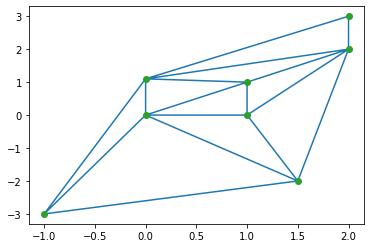

In [24]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')

To better see those points lets add enumerations and labeling the triangles

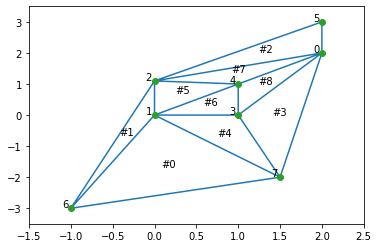

In [28]:
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-1.5, 2.5); plt.ylim(-3.5, 3.5)
plt.show()

### Convex hulls

In [30]:
hull = scipy.spatial.ConvexHull(points)

Now visualize the convex hull

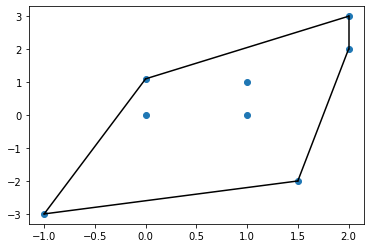

In [31]:
import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

### Voronoi

In [33]:
vor = scipy.spatial.Voronoi(points)
vor.vertices

array([[-0.09615385, -1.63461538],
       [-6.65      ,  0.55      ],
       [ 0.5725    ,  2.5       ],
       [ 4.08333333, -0.29166667],
       [ 0.5       , -1.1875    ],
       [ 0.45      ,  0.55      ],
       [ 0.5       ,  0.5       ],
       [ 0.63181818,  2.36818182],
       [ 2.5       ,  0.5       ]])

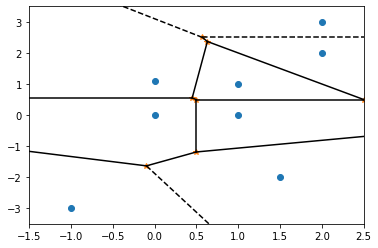

In [38]:
plt.plot(points[:,0], points[:,1], 'o')
plt.plot(vor.vertices[:,0], vor.vertices[:,1], '*')
plt.xlim(-1.5, 2.5); plt.ylim(-3.5, 3.5)

for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        plt.plot(vor.vertices[simplex,0], vor.vertices[simplex,1], 'k-')
        
center = points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.any(simplex < 0):
        i = simplex[simplex >= 0][0] # finite end Voronoi vertex
        t = points[pointidx[1]] - points[pointidx[0]] # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]]) # normal
        midpoint = points[pointidx].mean(axis=0)
        far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
        plt.plot([vor.vertices[i,0], far_point[0]], [vor.vertices[i,1], far_point[1]], 'k--')
plt.show()

## Final remarks

The modules presented here are just a small subset of the entire libray and functionality provided by Scipy.



A good reference to explore more of these routines can be found at [Scipy Tutorial](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/index.html)